In [29]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

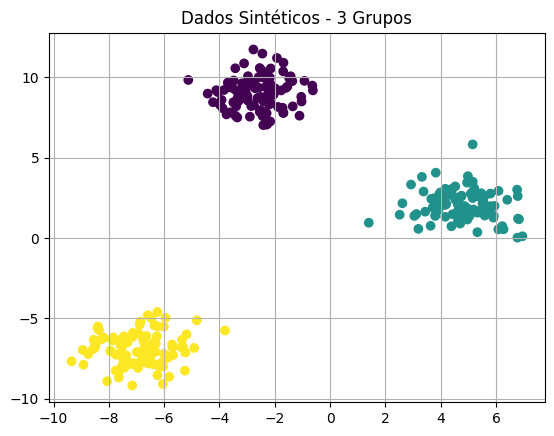

In [30]:

# Gerar dados sintéticos
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Visualizar os dados
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dados Sintéticos - 3 Grupos")
plt.grid(True)
plt.show()

In [31]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
som = MiniSom(x=7, y=7, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=200)

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def visualizar_som(som, X_scaled, y):
    width = som._weights.shape[0]
    height = som._weights.shape[1]

    plt.figure(figsize=(10, 10))

    # Frequência de ativações por neurônio
    frequencies = np.zeros((width, height))
    for x in X_scaled:
        w = som.winner(x)
        frequencies[w[0], w[1]] += 1

    # Heatmap visual
    plt.pcolor(frequencies.T, cmap='Blues', edgecolors='k', linewidths=1)
    plt.colorbar(label="Número de ativações")

    # Números das classes
    for i, x in enumerate(X_scaled):
        w = som.winner(x)
        plt.text(w[0] + 0.5, w[1] + 0.5, str(y[i]),
                 ha='center', va='center',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.title("Mapa Auto-Organizado (SOM) com Heatmap")
    plt.xticks(np.arange(width + 1))
    plt.yticks(np.arange(height + 1))
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()


In [ ]:
visualizar_som(som, X_scaled, y)